In [3]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
#hide
from fastbook import *
from fastai.vision.widgets import *

In [1]:
import os
key = os.environ.get('AZURE_SEARCH_KEY', '39f25aae8d744a528b964a94a4af8b58')

In [6]:
reptile_types = 'crocodile','alligator','caiman'
path = Path('reptiles')

In [ ]:
# if not path.exists():
#     path.mkdir()
#     for o in reptile_types:
#         dest = (path/o)
#         dest.mkdir(exist_ok=True)
#         results = search_images_bing(key, f'{o}')
#         download_images(dest, urls=results.attrgot('content_url'))

In [7]:
fns = get_image_files(path)
fns

(#444) [Path('reptiles/alligator/00000000.jpg'),Path('reptiles/alligator/00000001.jpg'),Path('reptiles/alligator/00000002.jpg'),Path('reptiles/alligator/00000003.jpg'),Path('reptiles/alligator/00000004.jpg'),Path('reptiles/alligator/00000005.jpg'),Path('reptiles/alligator/00000006.jpg'),Path('reptiles/alligator/00000007.jpg'),Path('reptiles/alligator/00000008.jpg'),Path('reptiles/alligator/00000009.jpg')...]

In [8]:
failed = verify_images(fns)
failed

(#7) [Path('reptiles/alligator/00000002.jpg'),Path('reptiles/caiman/00000021.jpg'),Path('reptiles/caiman/00000071.jpg'),Path('reptiles/caiman/00000115.JPG'),Path('reptiles/crocodile/00000017.jpg'),Path('reptiles/crocodile/00000036.jpg'),Path('reptiles/crocodile/00000089.jpg')]

In [9]:
failed.map(Path.unlink)

(#7) [None,None,None,None,None,None,None]

(#0) []

In [11]:
class DataLoaders(GetAttr):
    def __init__(self, *loaders): self.loaders = loaders
    def __getitem__(self, i): return self.loaders[i]
    train,valid = add_props(lambda i, self: self[i])
        

In [12]:
reptiles = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [13]:
dls = reptiles.dataloaders(path)

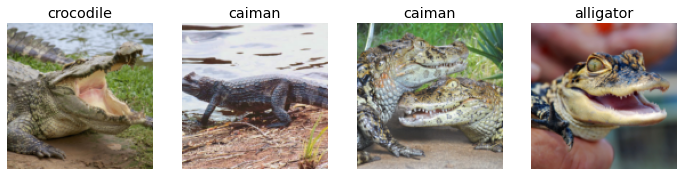

In [14]:
dls.valid.show_batch(max_n=4, nrows=1)

In [15]:
reptiles = reptiles.new(item_tfms=RandomResizedCrop(224, min_scale=0.5),
                        batch_tfms=aug_transforms())
dls = reptiles.dataloaders(path)

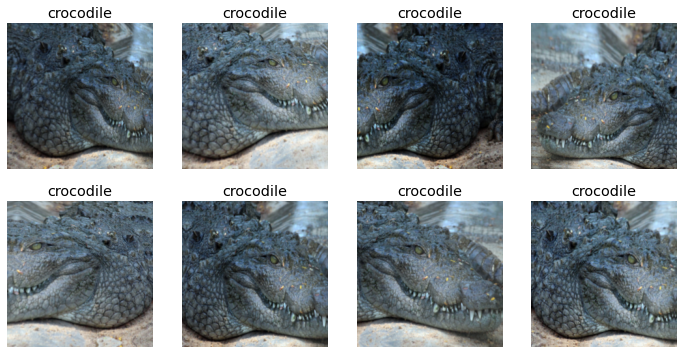

In [18]:
dls.train.show_batch(max_n=8,nrows=2,unique=True)

In [20]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

RuntimeError: cuda runtime error (801) : operation not supported at ..\torch/csrc/generic/StorageSharing.cpp:247

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()